In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 
                35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 
                500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
                620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

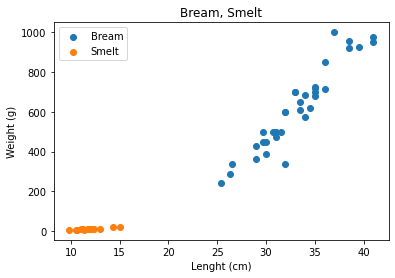

In [41]:
plt.scatter(bream_length, bream_weight, label = "Bream")
plt.scatter(smelt_length, smelt_weight, label = "Smelt")

plt.title("Bream, Smelt")
plt.xlabel("Lenght (cm)")
plt.ylabel("Weight (g)")
plt.legend()

plt.show()

In [42]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(bream_length))
print(np.shape(smelt_length))

fish_data = np.column_stack((length, weight))
print(np.shape(fish_data))
fish_data[:5]

fish_target = np.append(np.ones(35), np.zeros(14))
fish_target

(49,)
(35,)
(14,)
(49, 2)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, 
    stratify = fish_target, random_state = 42)

In [44]:
print(np.shape(fish_data))
print(np.shape(train_input), np.shape(test_input))
print(train_target)
print(test_target)

(49, 2)
(36, 2) (13, 2)
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [46]:
## knn

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)

kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.score(train_input, train_target)

1.0

In [47]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

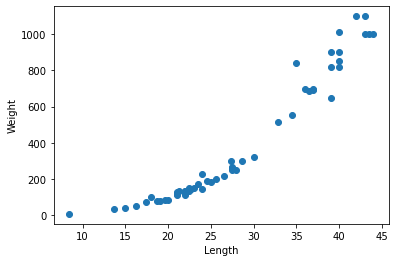

In [48]:
plt.scatter(perch_length, perch_weight)

plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()

In [49]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 18)

print(np.shape(train_input))
print(np.shape(test_input))

(42,)
(14,)


In [50]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(np.shape(train_input))
print(np.shape(test_input))

(42, 1)
(14, 1)


In [54]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9248273704029688
0.985984108475348


In [34]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1, 21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    r2_train.append(knr.score(train_input, train_target))
    r2_test.append(knr.score(test_input, test_target))
    neighbor_n.append(n)
    
print(r2_train)
print(r2_test)
print(neighbor_n)

[0.9909626604539287, 0.9921166692515713, 0.9896443616325816, 0.9886251202535614, 0.985984108475348, 0.9816995303072257, 0.9832055035341443, 0.9804695158191586, 0.976860365385182, 0.9700306797998369, 0.9632441540419345, 0.9618366212507524, 0.9517762622427662, 0.9550964310755695, 0.9442193923513246, 0.9344536125648618, 0.9208661120377768, 0.9038360525749365, 0.882043961740988, 0.8579684163186536]
[0.7994546478633184, 0.9206568300175366, 0.9142757052106307, 0.912780815205306, 0.9248273704029688, 0.9024710220092916, 0.9272456285487161, 0.9305681084312803, 0.9192988794659098, 0.9042548992611195, 0.8951736624884379, 0.8728225557918328, 0.8687045371373334, 0.8679294739383074, 0.8576141968741275, 0.8303188744089556, 0.8089259910909494, 0.7921716104305297, 0.7704731811663179, 0.7594069126405957]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


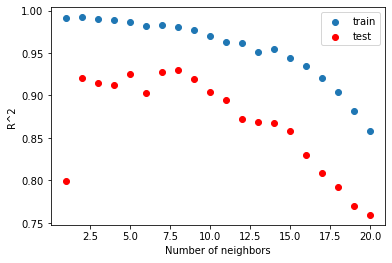

In [36]:
plt.scatter(neighbor_n, r2_train, label = "train")
plt.scatter(neighbor_n, r2_test, c="r", label = "test")

plt.xlabel("Number of neighbors")
plt.ylabel("R^2")
plt.legend()

plt.show()